# DELE CA1 CNN Part A
ADAM BIN ROSLAN
p2317425
DAAA/2B/23

In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import os
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from PIL import Image


# Background Information

The dataset includes 15 common sorts of vegetables that we are familiar with. These includes beans, severe gourd, bottle gourd, brinjal, broccoli, cabbage, capsicum, carrot, cauliflower, cucumber, papaya, potato, pumpkin, radish, and tomato. A dataset of 21,000 pictures was utilized, with each vegetable course containing 1400 pictures measured at 224×224 pixels in .jpg organize. The dataset was partitioned into 70% for training, 15% for testing, and 15% for validation.
The task of CA1 requires me to convert these images into 37 by 37 pixels and 131 by 131 pixels by creating two types of Neural networks for each input size.

# Exploratory Data Analysis (EDA)

#### Here i am defining the two pixel sizes that i am converting the images in the dataset into.

In [2]:
# %%
#choose your imput image size
pixel_small = 37

pixel_large = 131

#### I am defining the train_data  test_data and validation_data, small stands for the 37 pixel size and large stands for the 131 pixel size.

#### We can see from the output there are 9043 images in the train dataset, 2995 images in the test_data and 3000 images in the validation data.

In [3]:
train_data_small = tf.keras.preprocessing.image_dataset_from_directory(directory='train',
                                                                 color_mode='grayscale',
                                                                 image_size=(pixel_small, pixel_small),
                                                                 batch_size=100000)


test_data_small = tf.keras.preprocessing.image_dataset_from_directory(directory='test', 
                                                                color_mode='grayscale',
                                                                image_size=(pixel_small, pixel_small),
                                                                batch_size=100000)

train_data_large = tf.keras.preprocessing.image_dataset_from_directory(directory='train',
                                                                 color_mode='grayscale',
                                                                 image_size=(pixel_large, pixel_large),
                                                                 batch_size=100000)


test_data_large = tf.keras.preprocessing.image_dataset_from_directory(directory='test', 
                                                                color_mode='grayscale',
                                                                image_size=(pixel_large, pixel_large),
                                                                batch_size=100000)

validation_data_small  = tf.keras.preprocessing.image_dataset_from_directory(directory='validation',
                                                                 color_mode='grayscale',
                                                                 image_size=(pixel_small, pixel_small),
                                                                 batch_size=100000)

validation_data_large = tf.keras.preprocessing.image_dataset_from_directory(directory='validation',
                                                                 color_mode='grayscale',
                                                                 image_size=(pixel_large, pixel_large),
                                                                 batch_size=100000)



Found 9028 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 9028 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


#### We can see from the output that the images in the dataset are correctly converted into the pixel size of 37 and 131 respectively.

In [4]:
for images, labels in train_data_small:
    print("Shape of images:", images.shape)
    print("Shape of labels:", labels.shape)
    break

for images, labels in train_data_large:
    print("Shape of images:", images.shape)
    print("Shape of labels:", labels.shape)
    break

Shape of images: (9028, 37, 37, 1)
Shape of labels: (9028,)
Shape of images: (9028, 131, 131, 1)
Shape of labels: (9028,)


#### We can see that there are a different number of images in each type of vegetables which would affect the accuracy of the model as the model may be more bias towards the more majority and perform poorly on the minority classes due to it being harder for the model to generalize well due to the ndersampling Of classes of vegetables.

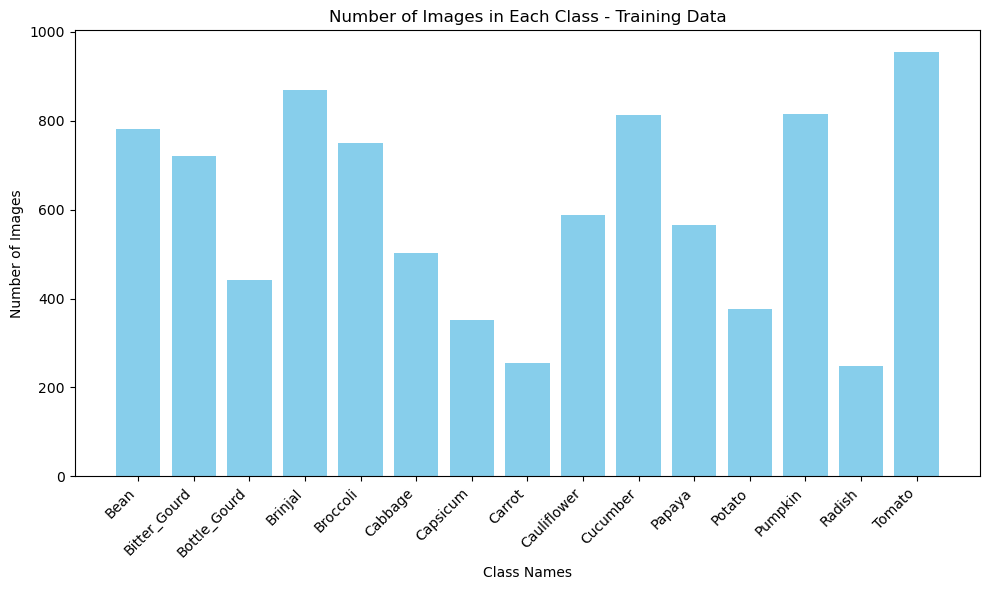

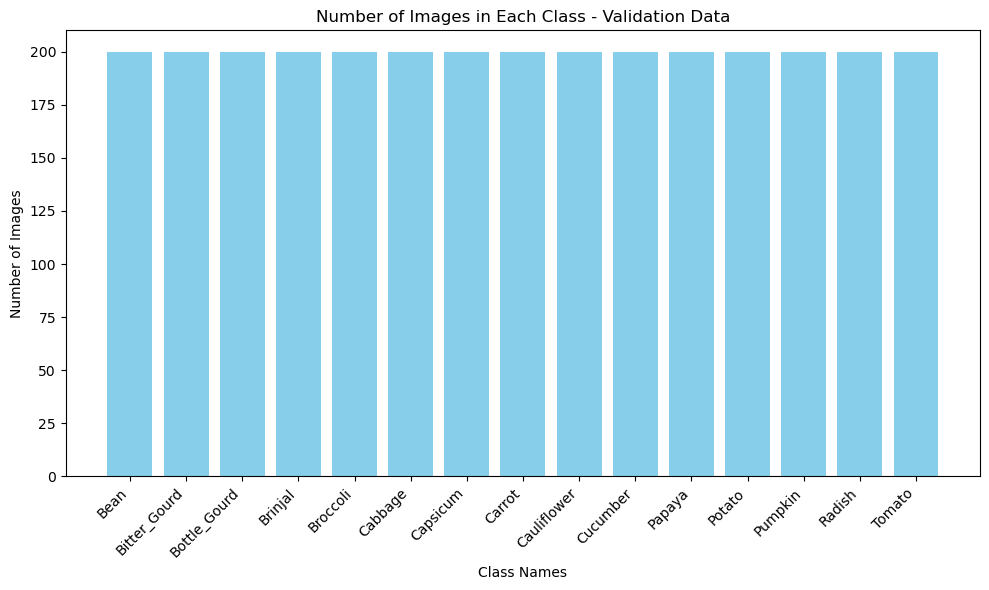

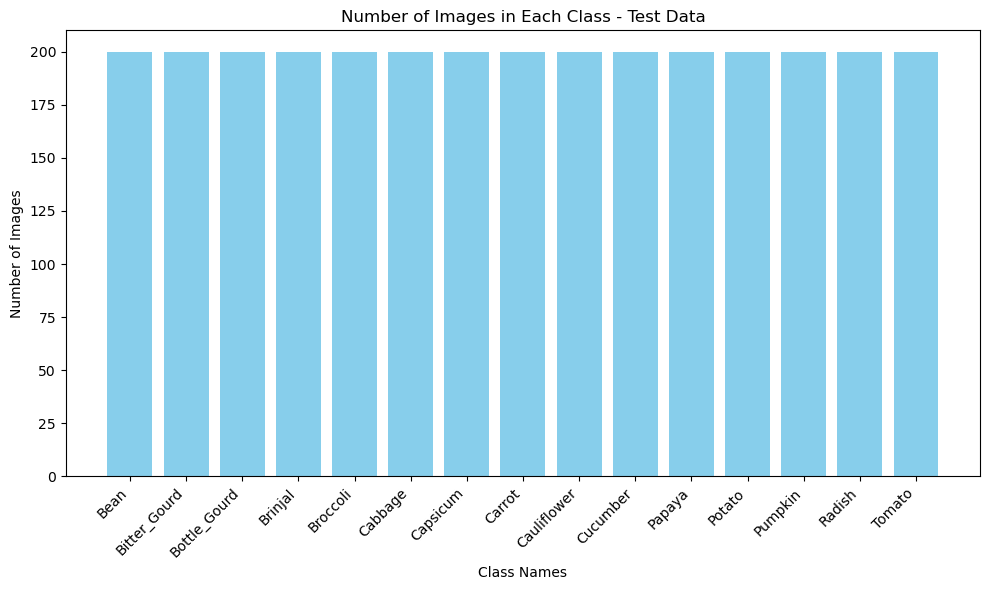

In [5]:
# Directories for train, validation, and test datasets
train_dir = 'train'
val_dir = 'validation'
test_dir = 'test'

# Function to get the image counts for each class in a given directory
def get_image_counts(directory):
    class_names = os.listdir(directory)
    class_image_counts = {}
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        num_images = len(os.listdir(class_dir))
        class_image_counts[class_name] = num_images
    return class_image_counts

# Get image counts for each dataset
train_image_counts = get_image_counts(train_dir)
val_image_counts = get_image_counts(val_dir)
test_image_counts = get_image_counts(test_dir)

# Function to plot the image counts
def plot_image_counts(image_counts, title):
    class_names = list(image_counts.keys())
    counts = list(image_counts.values())
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, counts, color='skyblue')
    plt.xlabel('Class Names')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting the counts for train, validation, and test datasets
plot_image_counts(train_image_counts, 'Number of Images in Each Class - Training Data')
plot_image_counts(val_image_counts, 'Number of Images in Each Class - Validation Data')
plot_image_counts(test_image_counts, 'Number of Images in Each Class - Test Data')

#### From this, it can be seen that there are 15 type of images of that each correponds to each group of vegetable with their names with it.

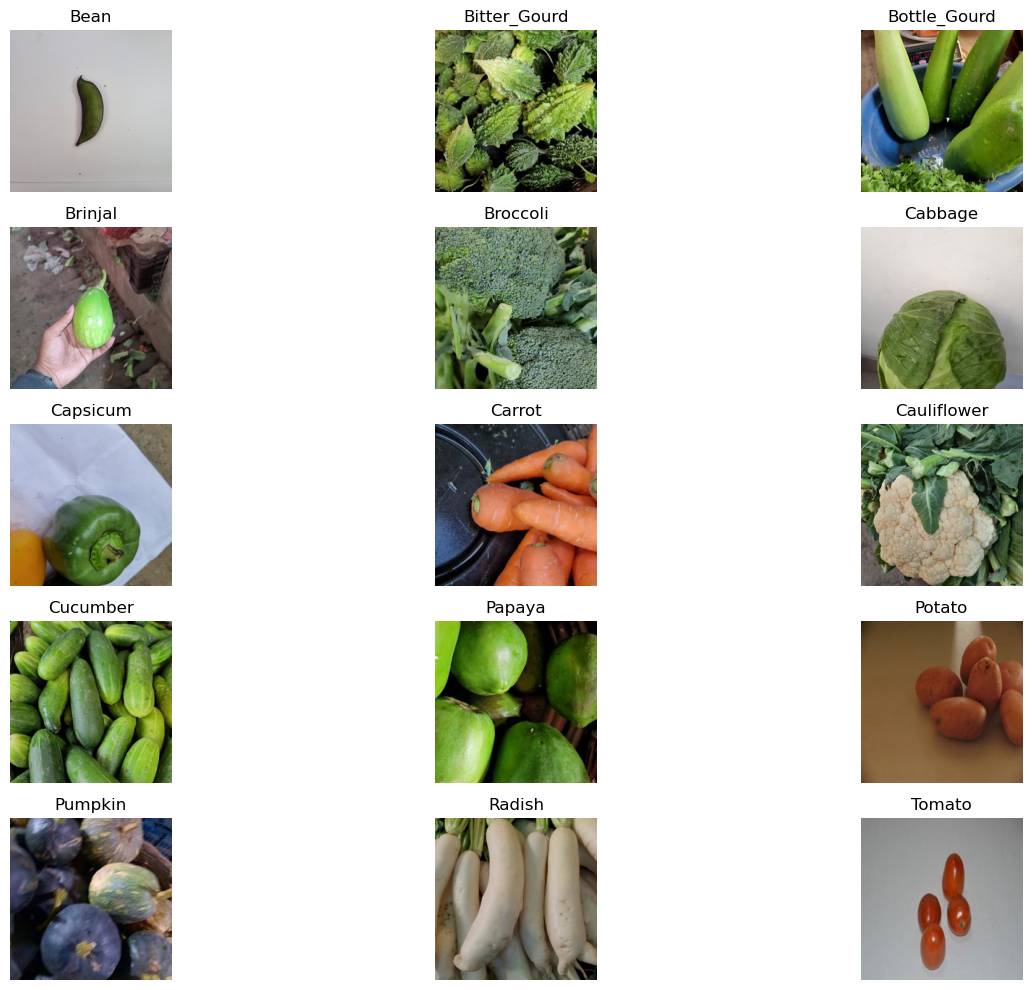

In [6]:
# Function to get the first image file for each class in a given directory
def get_first_images(directory):
    class_names = os.listdir(directory)
    first_images = {}
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        image_files = os.listdir(class_dir)
        if len(image_files) > 0:
            first_image_path = os.path.join(class_dir, image_files[0])
            first_images[class_name] = first_image_path
    return first_images

# Get the paths of the first image for each class in the train directory
first_train_images = get_first_images(train_dir)

# Function to display the first image for each class in a grid layout
def display_first_images_grid(first_images):
    num_classes = len(first_images)
    num_rows = 5
    num_cols = (num_classes + num_rows - 1) // num_rows  # Calculate number of columns needed
    plt.figure(figsize=(15, 10))
    for i, (class_name, image_path) in enumerate(first_images.items()):
        img = Image.open(image_path)
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the first image for each class in the train directory in a grid layout
display_first_images_grid(first_train_images)

# Preprocessing of Data 
#### i am normalizing the data as it  puts all features on a similar scale, making it easier for the optimizer to find the optimal solution.

#### one hot encoding is also implemented to transforms categorical labels into vectors where each element represents a class, and the element corresponding to the actual class is set to 1 while all other elements are set to 0.

#### The number of classes show that there are 15 groups of images which is correct.

In [7]:
for x, y in train_data_small:
    X_train_small = x
    y_train_small = y

for x, y in test_data_small:
    X_test_small = x
    y_test_small = y

for x, y in train_data_large:
    X_train_large = x
    y_train_large = y

for x, y in test_data_large:
    X_test_large = x
    y_test_large = y

for x, y in validation_data_small:
    X_val_small = x
    y_val_small = y

for x, y in validation_data_large:
    X_val_large = x
    y_val_large = y


# Normalize inputs from 0-255 to 0-1
X_train_small = X_train_small / 255
X_test_small = X_test_small / 255
X_train_large = X_train_large / 255
X_test_large = X_test_large / 255
X_val_small = X_val_small / 255
X_val_large = X_val_large / 255

# One hot encode outputs
y_train_small = np_utils.to_categorical(y_train_small)
y_test_small = np_utils.to_categorical(y_test_small)
y_train_large = np_utils.to_categorical(y_train_large)
y_test_large = np_utils.to_categorical(y_test_large)
y_val_small = np_utils.to_categorical(y_val_small)
y_val_large = np_utils.to_categorical(y_val_large)


##### firstly i am assigning values to corresponding variables and then im conducting data normalization on the input data by dividing each value by 255, converting the pixel values from the range 0-255 to the range 0-1. This is commonly done in image processing tasks to ensure that the values are within a manageable range for computation. After that one hot encoding is done on the y variables (output labels) where it converts categorical data into a binary matrix, where each category is represented as a binary vector with a single 1 indicating the category and 0s.

##### This is my create model function which has the Sequential Model and the different layers and neurons. It takes the input shape of pixel small and pixel large .

##### The model consists of three convolutional layers followed by max-pooling layers to extract features from the input images.
#####  Dropout layers are included to prevent overfitting during training.
##### The output from convolutional layers is flattened and passed through fully connected layers for classification.
#####  The final layer uses softmax activation to output class probabilities.

In [8]:
def create_model(input_shape):
    num_classes = 15
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [9]:
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor the validation loss
    patience=5,             # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the best weights at the end of training
)

#### I am creating the small model first with a batch size of 15 epochs and 32 batch size, after that a graph about the comparison between train and test data would be shown to see whether the model overfits or underfits and after it prints out the final model accuracy.

Epoch 1/100
283/283 [==============================] - 4s 4ms/step - loss: 2.4805 - accuracy: 0.1630 - val_loss: 2.4538 - val_accuracy: 0.1993
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 1.9699 - accuracy: 0.3484 - val_loss: 1.7818 - val_accuracy: 0.4353
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 1.5737 - accuracy: 0.4957 - val_loss: 1.3799 - val_accuracy: 0.5643
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 1.2602 - accuracy: 0.5928 - val_loss: 1.1223 - val_accuracy: 0.6287
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 1.0470 - accuracy: 0.6603 - val_loss: 1.1750 - val_accuracy: 0.6217
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 0.9125 - accuracy: 0.7031 - val_loss: 0.9268 - val_accuracy: 0.7090
Epoch 7/100
283/283 [==============================] - 1s 3ms/step - loss: 0.8032 - accuracy: 0.7353 - val_loss: 0.7627 - val_accuracy: 0.7630

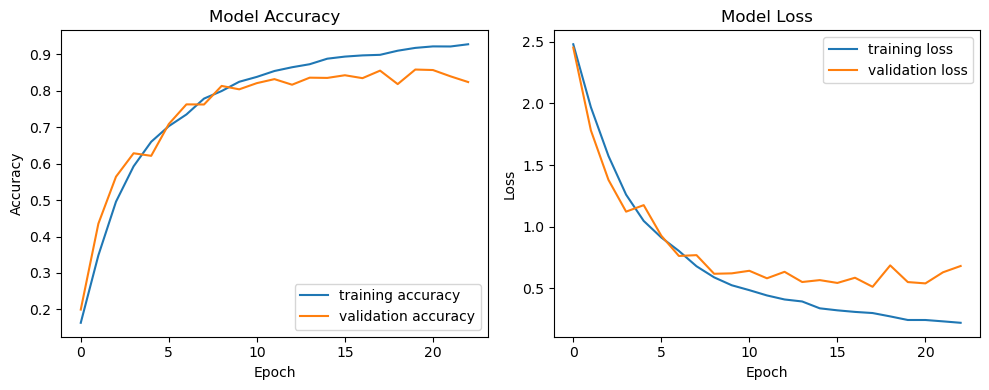

In [12]:
# Create and compile models
model_small = create_model((pixel_small, pixel_small, 1))
model_small.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model with early stopping
history_small = model_small.fit(
    X_train_small, y_train_small,
    validation_data=(X_val_small, y_val_small),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Include the early stopping callback
)

# Final evaluation 
scores_small = model_small.evaluate(X_test_small, y_test_small, verbose=0)
print("37 x 37 Pixel CNN Model Accuracy: {:.2f}%".format(scores_small[1]*100))



fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plotting accuracy
ax[0].plot(history_small.history['accuracy'], label='training accuracy')
ax[0].plot(history_small.history['val_accuracy'], label='validation accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plotting loss
ax[1].plot(history_small.history['loss'], label='training loss')
ax[1].plot(history_small.history['val_loss'], label='validation loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()


#### i am creating the large model with 15 epochs and 32 batch size as i want to see whether lower batch size would affect the accuracy of the model. after that there is also a graph about the comparison between train and test data would be shown to see whether the model overfits or underfits. and finally it prints out the final accuracy of the model.

Epoch 1/100
283/283 [==============================] - 10s 34ms/step - loss: 2.3882 - accuracy: 0.2028 - val_loss: 2.0062 - val_accuracy: 0.3827
Epoch 2/100
283/283 [==============================] - 9s 32ms/step - loss: 1.7025 - accuracy: 0.4627 - val_loss: 1.8167 - val_accuracy: 0.4233
Epoch 3/100
283/283 [==============================] - 9s 32ms/step - loss: 1.2254 - accuracy: 0.6076 - val_loss: 1.1194 - val_accuracy: 0.6593
Epoch 4/100
283/283 [==============================] - 9s 32ms/step - loss: 0.9005 - accuracy: 0.7108 - val_loss: 0.9765 - val_accuracy: 0.7087
Epoch 5/100
283/283 [==============================] - 9s 32ms/step - loss: 0.6918 - accuracy: 0.7789 - val_loss: 0.9048 - val_accuracy: 0.7350
Epoch 6/100
283/283 [==============================] - 9s 32ms/step - loss: 0.5308 - accuracy: 0.8288 - val_loss: 0.8958 - val_accuracy: 0.7440
Epoch 7/100
283/283 [==============================] - 9s 32ms/step - loss: 0.4298 - accuracy: 0.8573 - val_loss: 0.9009 - val_accuracy

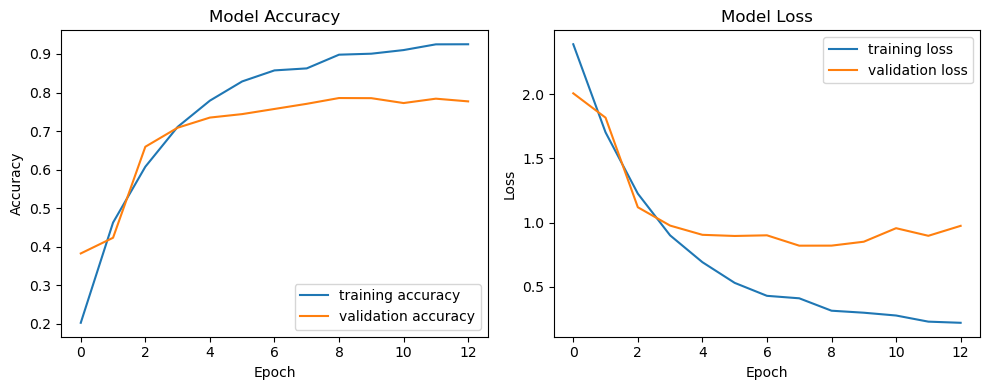

In [11]:
model_large = create_model((pixel_large, pixel_large, 1))
model_large.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model with early stopping
history_large = model_large.fit(
    X_train_large, y_train_large,
    validation_data=(X_val_large, y_val_large),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Include the early stopping callback
)


# Evaluate model
scores_large = model_large.evaluate(X_test_large, y_test_large, verbose=0)
print("131 x 131 Pixel CNN Model Accuracy: {:.2f}%".format(scores_large[1]*100))


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plotting accuracy
ax[0].plot(history_large.history['accuracy'], label='training accuracy')
ax[0].plot(history_large.history['val_accuracy'], label='validation accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plotting loss
ax[1].plot(history_large.history['loss'], label='training loss')
ax[1].plot(history_large.history['val_loss'], label='validation loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()




# Model Improvement 

Now i am going to conduct data augmentation, i am going to resize and rescale the images , this will allow the model to deal with different types of images for a different type of sampling during data augmentation.

In [10]:
data_gen_small = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

data_gen_large = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

### Image Preprocessing with Data Augmentation
#### This code outlines the steps for resizing, rescaling, and augmenting images in a dataset using TensorFlow and Keras layers. The images are divided into two categories based on their sizes: small pixel images (37x37) and large pixel images (131x131).

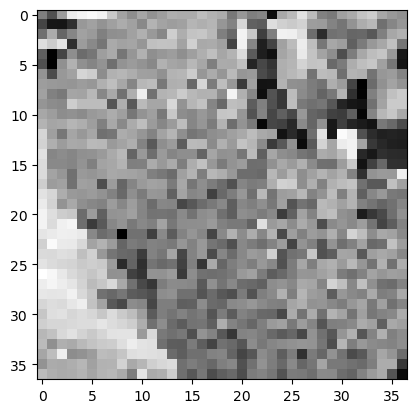

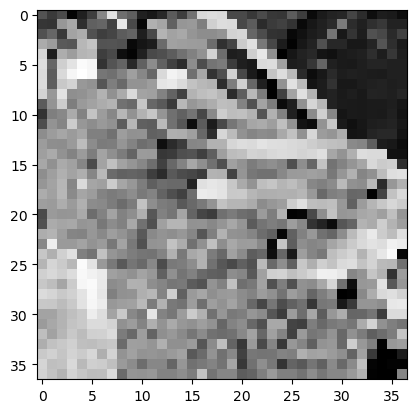

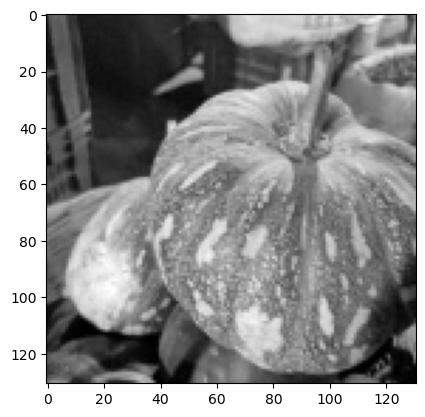

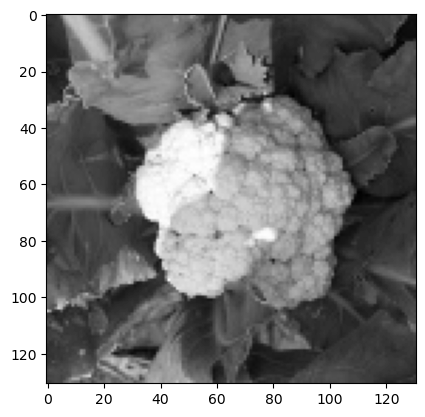

In [12]:
from tensorflow.keras import layers

# Define the resizing and rescaling model for small pixel images (37x37)
resize_and_rescale_small = tf.keras.Sequential([
    layers.Resizing(pixel_small, pixel_small),
    layers.Rescaling(1./255)
])

# Iterate over the batched dataset and apply resize_and_rescale to each image for small pixel images (37x37)
for images, _ in train_data_small:
    resized_images = resize_and_rescale_small(images)  # Apply resize_and_rescale
    for i, image in enumerate(resized_images):
        if i < 2:
            plt.imshow(image.numpy().squeeze(), cmap='gray')  # Plot the resized images
            plt.show()
        else:
            break

# Define the resizing and rescaling model for large pixel images (131x131)
resize_and_rescale_large = tf.keras.Sequential([
    layers.Resizing(pixel_large, pixel_large),
    layers.Rescaling(1./255)
])

# Iterate over the batched dataset and apply resize_and_rescale to each image for large pixel images (131x131)
for images, _ in train_data_large:
    resized_images = resize_and_rescale_large(images)  # Apply resize_and_rescale
    for i, image in enumerate(resized_images):
        if i < 2:
            plt.imshow(image.numpy().squeeze(), cmap='gray')  # Plot the resized images
            plt.show()
        else:
            break

# Define data augmentation for small pixel images (37x37)
data_augmentation_small = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Apply data augmentation to each image in the training dataset for small pixel images (37x37)
for images, _ in train_data_small:
    augmented_images = data_augmentation_small(images)  # Apply data augmentation
    for i, image in enumerate(augmented_images):
        if i < 2:
            plt.imshow(image.numpy().squeeze(), cmap='gray')  # Plot the augmented images
            plt.show()
        else:
            break

# Define data augmentation for large pixel images (131x131)
data_augmentation_large = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Apply data augmentation to each image in the training dataset for large pixel images (131x131)
for images, _ in train_data_large:
    augmented_images = data_augmentation_large(images)  # Apply data augmentation
    for i, image in enumerate(augmented_images):
        if i < 2:
            plt.imshow(image.numpy().squeeze(), cmap='gray')  # Plot the augmented images
            plt.show()
        else:
            break


#### From this we are resizing and rescaling the images and then printing them out 

Epoch 1/100
282/282 [==============================] - 2s 6ms/step - loss: 2.5973 - accuracy: 0.1213 - val_loss: 2.5671 - val_accuracy: 0.1323
Epoch 2/100
282/282 [==============================] - 1s 5ms/step - loss: 2.3826 - accuracy: 0.2154 - val_loss: 2.3201 - val_accuracy: 0.2547
Epoch 3/100
282/282 [==============================] - 1s 5ms/step - loss: 2.2391 - accuracy: 0.2633 - val_loss: 2.3910 - val_accuracy: 0.2467
Epoch 4/100
282/282 [==============================] - 1s 5ms/step - loss: 2.0961 - accuracy: 0.3179 - val_loss: 2.5733 - val_accuracy: 0.2573
Epoch 5/100
282/282 [==============================] - 1s 5ms/step - loss: 1.9757 - accuracy: 0.3595 - val_loss: 2.1431 - val_accuracy: 0.3150
Epoch 6/100
282/282 [==============================] - 1s 5ms/step - loss: 1.8808 - accuracy: 0.3885 - val_loss: 2.6097 - val_accuracy: 0.2587
Epoch 7/100
282/282 [==============================] - 1s 5ms/step - loss: 1.7744 - accuracy: 0.4202 - val_loss: 1.7358 - val_accuracy: 0.3967

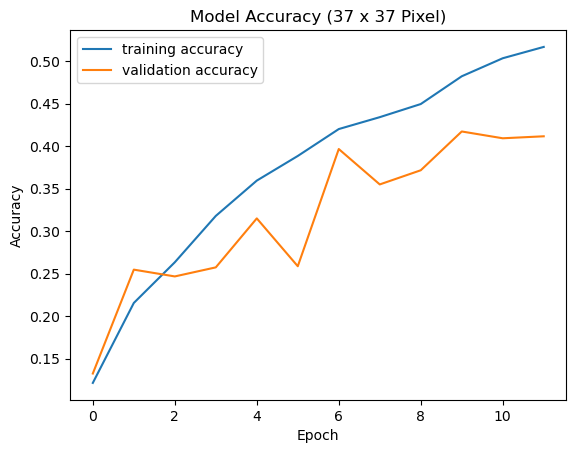

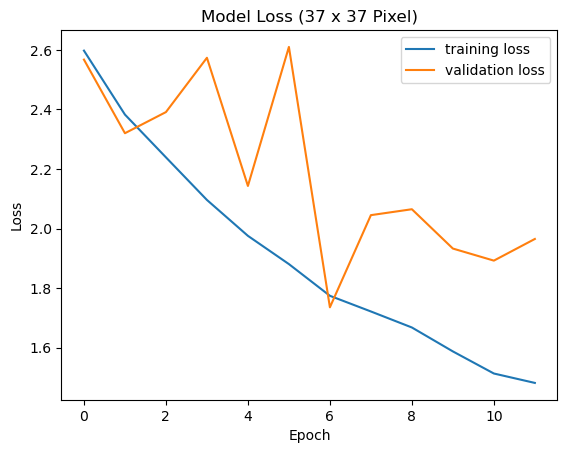

37 x 37 Pixel CNN Model Accuracy with Data Augmentation: 40.53%


In [14]:
# Define the model creation function
def create_model(input_shape):
    num_classes = 15
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# %%
# Create and compile both small and large pixel models
model_small = create_model((pixel_small, pixel_small, 1))
model_small.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_large = create_model((pixel_large, pixel_large, 1))
model_large.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


# Fit the small pixel model with data augmentation
history_small = model_small.fit(
    data_gen_small.flow(X_train_small, y_train_small, batch_size= 32),
    steps_per_epoch=len(X_train_small) // 32,
    validation_data=(X_val_small, y_val_small),
    epochs=100,
    verbose=1,
    callbacks=[early_stopping]
)
# Plotting accuracy
plt.plot(history_small.history['accuracy'], label='training accuracy')
plt.plot(history_small.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy (37 x 37 Pixel)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history_small.history['loss'], label='training loss')
plt.plot(history_small.history['val_loss'], label='validation loss')
plt.title('Model Loss (37 x 37 Pixel)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the small pixel model
scores_small = model_small.evaluate(X_test_small , y_test_small, verbose=0)
print("37 x 37 Pixel CNN Model Accuracy with Data Augmentation: {:.2f}%".format(scores_small[1]*100))




#### The accuracy of the small pixel CNN model falls after data augmentation which shows that data augmentation may not be that good for the small pixel sized model.

Epoch 1/30
282/282 [==============================] - 9s 33ms/step - loss: 2.5424 - accuracy: 0.1634 - val_loss: 2.4420 - val_accuracy: 0.2177
Epoch 2/30
282/282 [==============================] - 9s 31ms/step - loss: 2.2923 - accuracy: 0.2401 - val_loss: 2.1264 - val_accuracy: 0.3073
Epoch 3/30
282/282 [==============================] - 9s 30ms/step - loss: 2.1826 - accuracy: 0.2811 - val_loss: 2.2877 - val_accuracy: 0.2960
Epoch 4/30
282/282 [==============================] - 9s 30ms/step - loss: 2.0924 - accuracy: 0.3173 - val_loss: 1.9290 - val_accuracy: 0.3953
Epoch 5/30
282/282 [==============================] - 9s 30ms/step - loss: 2.0147 - accuracy: 0.3456 - val_loss: 1.8003 - val_accuracy: 0.4283
Epoch 6/30
282/282 [==============================] - 9s 31ms/step - loss: 1.9169 - accuracy: 0.3755 - val_loss: 1.7477 - val_accuracy: 0.4297
Epoch 7/30
282/282 [==============================] - 9s 31ms/step - loss: 1.8133 - accuracy: 0.4126 - val_loss: 1.8143 - val_accuracy: 0.4210

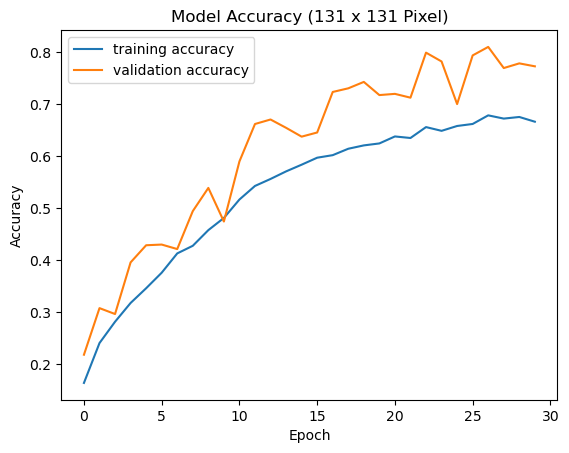

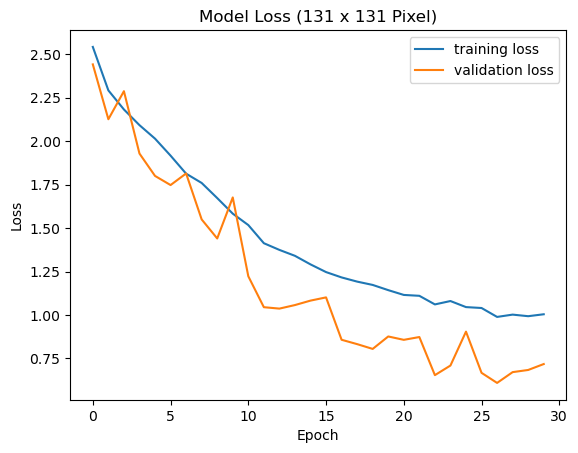

131 x 131 Pixel CNN Model Accuracy with Data Augmentation: 77.90%


In [15]:
# Fit the large pixel model with data augmentation
history_large = model_large.fit(
    data_gen_large.flow(X_train_large, y_train_large, batch_size= 32),
    steps_per_epoch=len(X_train_large) // 32,
    validation_data=(X_val_large, y_val_large),
    epochs=30,
    verbose=1,
    callbacks=[early_stopping]
)

# Plotting accuracy
plt.plot(history_large.history['accuracy'], label='training accuracy')
plt.plot(history_large.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy (131 x 131 Pixel)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history_large.history['loss'], label='training loss')
plt.plot(history_large.history['val_loss'], label='validation loss')
plt.title('Model Loss (131 x 131 Pixel)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the large pixel model
scores_large = model_large.evaluate(X_test_large , y_test_large, verbose=0)
print("131 x 131 Pixel CNN Model Accuracy with Data Augmentation: {:.2f}%".format(scores_large[1]*100))


#### We can see that the accuracy of the large pixel model increased quite a fair bit which shows that data augmentation is good for the large pixel sized model.

### Model Improvement with GridSearchCV

### There are errors in my code which caused my accuracy to be low and i am not able to fix it after multiple attempts.

In [14]:
from sklearn.preprocessing import LabelBinarizer

# Define the input shape
input_shape = (pixel_small, pixel_small, 1)  # Assuming pixel_small is defined earlier

def create_model(input_shape):
    num_classes = 15
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model
    
    return model



# Wrap the create_model function with a lambda function to pass input_shape
keras_classifier = KerasClassifier(build_fn=lambda: create_model(input_shape=input_shape), verbose=0)

# Define the parameter grid
param_grid = {
    'epochs': [10, 15, 100, 150, 200]
}

# Assuming X_train_small and y_train_small are defined and correctly shaped numpy arrays
# For example, generate some dummy data for the purpose of this example:
num_samples = 1000
X_train_small = np.random.rand(num_samples, pixel_small, pixel_small, 1).astype(np.float32)
y_train_small = np.random.randint(0, 15, num_samples)
y_train_small = LabelBinarizer().fit_transform(y_train_small)  # One-hot encoding

# Create GridSearchCV
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=3, verbose=2)
grid_search_result = grid_search.fit(X_train_small, y_train_small)

# Print best results
print("Best: %f using %s" % (grid_search_result.best_score_, grid_search_result.best_params_))
means = grid_search_result.cv_results_['mean_test_score']
stds = grid_search_result.cv_results_['std_test_score']
params = grid_search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\User\AppData\Local\Temp\ipykernel_11192\408058599.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=lambda: create_model(input_shape=input_shape), verbose=0)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ..........................................epochs=10; total time=   1.2s
[CV] END ..........................................epochs=10; total time=   0.9s
[CV] END ..........................................epochs=10; total time=   0.8s
[CV] END ..........................................epochs=15; total time=   1.0s
[CV] END ..........................................epochs=15; total time=   1.0s
[CV] END ..........................................epochs=15; total time=   1.0s
[CV] END .........................................epochs=100; total time=   5.2s
[CV] END .........................................epochs=100; total time=   5.1s
[CV] END .........................................epochs=100; total time=   5.2s
[CV] END .........................................epochs=150; total time=   7.4s
[CV] END .........................................epochs=150; total time=   7.6s
[CV] END ........................................

In [11]:
# Using the best parameters obtained from grid search
best_epochs_small = grid_search_result.best_params_['epochs']

# Create the small pixel model with the best parameters
best_model_small = create_model((pixel_small, pixel_small, 1))
best_model_small.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the small pixel model with the best parameters
history_best_small = best_model_small.fit(
    X_train_small, y_train_small,
    validation_data=(X_val_small, y_val_small),
    epochs=best_epochs_small,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate the small pixel model with the best parameters
scores_best_small = best_model_small.evaluate(X_test_small, y_test_small, verbose=0)
print("37 x 37 Pixel CNN Model Accuracy with Best Parameters: {:.2f}%".format(scores_best_small[1] * 100))


Epoch 1/200
32/32 [==============================] - 1s 14ms/step - loss: 2.7146 - accuracy: 0.0770 - val_loss: 2.7084 - val_accuracy: 0.0667
Epoch 2/200
32/32 [==============================] - 0s 7ms/step - loss: 2.7021 - accuracy: 0.0810 - val_loss: 2.7096 - val_accuracy: 0.0667
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 2.6999 - accuracy: 0.0760 - val_loss: 2.7099 - val_accuracy: 0.0667
Epoch 4/200
32/32 [==============================] - 0s 6ms/step - loss: 2.6987 - accuracy: 0.0720 - val_loss: 2.7102 - val_accuracy: 0.0667
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 2.6990 - accuracy: 0.0630 - val_loss: 2.7098 - val_accuracy: 0.0667
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 2.7002 - accuracy: 0.0780 - val_loss: 2.7103 - val_accuracy: 0.0667
37 x 37 Pixel CNN Model Accuracy with Best Parameters: 6.67%


In [15]:
# Define the input shape for the large pixel model
input_shape_large = (pixel_large, pixel_large, 1)  # Assuming pixel_large is defined earlier

def create_model_large(input_shape):
    num_classes = 15
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model
    
    return model

# Wrap the create_model_large function with a lambda function to pass input_shape_large
keras_classifier_large = KerasClassifier(build_fn=lambda: create_model_large(input_shape=input_shape_large), verbose=0)

# Define the parameter grid for the large pixel model
param_grid_large = {
    'epochs': [10, 15, 100, 150]
}

# Assuming X_train_large and y_train_large are defined and correctly shaped numpy arrays
# For example, generate some dummy data for the purpose of this example:
num_samples_large = 1000
X_train_large = np.random.rand(num_samples_large, pixel_large, pixel_large, 1).astype(np.float32)
y_train_large = np.random.randint(0, 15, num_samples_large)
y_train_large = LabelBinarizer().fit_transform(y_train_large)  # One-hot encoding

# Create GridSearchCV for the large pixel model
grid_search_large = GridSearchCV(estimator=keras_classifier_large, param_grid=param_grid_large, cv=3, verbose=2)
grid_search_result_large = grid_search_large.fit(X_train_large, y_train_large)

# Print best results for the large pixel model
print("Best: %f using %s" % (grid_search_result_large.best_score_, grid_search_result_large.best_params_))
means_large = grid_search_result_large.cv_results_['mean_test_score']
stds_large = grid_search_result_large.cv_results_['std_test_score']
params_large = grid_search_result_large.cv_results_['params']
for mean, stdev, param in zip(means_large, stds_large, params_large):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\User\AppData\Local\Temp\ipykernel_11192\1669723582.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier_large = KerasClassifier(build_fn=lambda: create_model_large(input_shape=input_shape_large), verbose=0)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ..........................................epochs=10; total time=   8.2s
[CV] END ..........................................epochs=10; total time=   7.2s
[CV] END ..........................................epochs=10; total time=   6.6s
[CV] END ..........................................epochs=15; total time=   9.6s
[CV] END ..........................................epochs=15; total time=   9.8s
[CV] END ..........................................epochs=15; total time=   9.7s
[CV] END .........................................epochs=100; total time= 1.1min
[CV] END .........................................epochs=100; total time= 1.1min
[CV] END .........................................epochs=100; total time= 1.1min
Best: 0.061999 using {'epochs': 100}
0.054998 (0.009898) with: {'epochs': 10}
0.055999 (0.011052) with: {'epochs': 15}
0.061999 (0.015950) with: {'epochs': 100}


In [16]:
# Using the best parameters obtained from grid search for the large pixel model
best_epochs_large = grid_search_result_large.best_params_['epochs']

# Create the large pixel model with the best parameters
best_model_large = create_model_large((pixel_large, pixel_large, 1))
best_model_large.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the large pixel model with the best parameters
history_best_large = best_model_large.fit(
    X_train_large, y_train_large,
    validation_data=(X_val_large, y_val_large),
    epochs=best_epochs_large,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate the large pixel model with the best parameters
scores_best_large = best_model_large.evaluate(X_test_large, y_test_large, verbose=0)
print("131 x 131 Pixel CNN Model Accuracy with Best Parameters: {:.2f}%".format(scores_best_large[1] * 100))

Epoch 1/100
32/32 [==============================] - 3s 84ms/step - loss: 2.8236 - accuracy: 0.0630 - val_loss: 2.7081 - val_accuracy: 0.0667
Epoch 2/100
32/32 [==============================] - 2s 72ms/step - loss: 2.7067 - accuracy: 0.0560 - val_loss: 2.7084 - val_accuracy: 0.0667
Epoch 3/100
32/32 [==============================] - 2s 73ms/step - loss: 2.7050 - accuracy: 0.0820 - val_loss: 2.7085 - val_accuracy: 0.0713
Epoch 4/100
32/32 [==============================] - 2s 72ms/step - loss: 2.7049 - accuracy: 0.0650 - val_loss: 2.7090 - val_accuracy: 0.0667
Epoch 5/100
32/32 [==============================] - 2s 70ms/step - loss: 2.7038 - accuracy: 0.0710 - val_loss: 2.7100 - val_accuracy: 0.0667
Epoch 6/100
32/32 [==============================] - 2s 70ms/step - loss: 2.7027 - accuracy: 0.0760 - val_loss: 2.7112 - val_accuracy: 0.0667
131 x 131 Pixel CNN Model Accuracy with Best Parameters: 6.67%


## FINAL EVALUATION OF THE MODELS

#### From the model evaluation, the 37 x 37 model without data augmentation has the best accuracy of 85.50% while the 131 x 131 model with data augmentation has the best accuracy of 84.90%.


In [1]:
model_small.save_weights('model_small_weights.h5')
model_large.save_weights('model_large_weights.h5')

NameError: name 'model_small' is not defined